# Machine Learning
---


## Working with Iris-Dataset

#### Load Requisites

In [52]:
%matplotlib inline
# Data manipulation tools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Statistical operations and Machine learning tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut, validation_curve, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

sns.set_style("darkgrid")


# Load dataset
df = sns.load_dataset('iris')

#### Explore the multivariate relationship

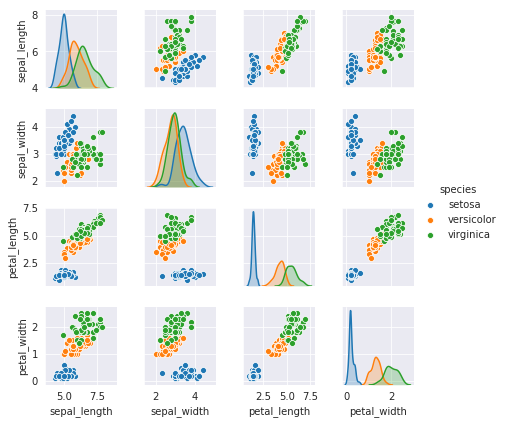

In [53]:
sns.pairplot(df, hue = 'species', size = 1.5)

#### Supervised learning - Known Labels of response variable

In [33]:
x = df.drop('species', axis=1)
print(x.shape)
y = df['species']
print(y.shape)

(150, 4)
(150,)


In [26]:
 x_train, xtest, y_train, ytest = train_test_split(x, y, random_state = 1)

In [34]:
mod = GaussianNB()
mod.fit(x_train, y_train)
y_pred = mod.predict(xtest)
accuracy_score(ytest, y_pred)

0.9736842105263158

Here, we can observe about 97% accuracy rate in prediting the labels with `Gaussian Naive Bayes` model.

#### Unsupervised Learning - Blindfold labels and predict by `decomposition`

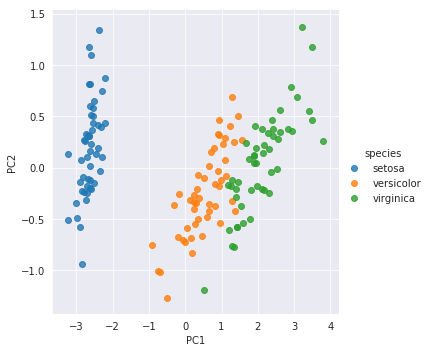

In [54]:
# Modelling by Principal component analysis
mod = PCA(n_components=2)
mod.fit(x)
df['PC1'] = mod.transform(x)[:,0]
df['PC2'] = mod.transform(x)[:,1]

sns.lmplot("PC1", "PC2", hue = "species", data = df, fit_reg = False)

By `Principal Component Analysis` we can determine the cluster separation of maximum variance explained by the labels.

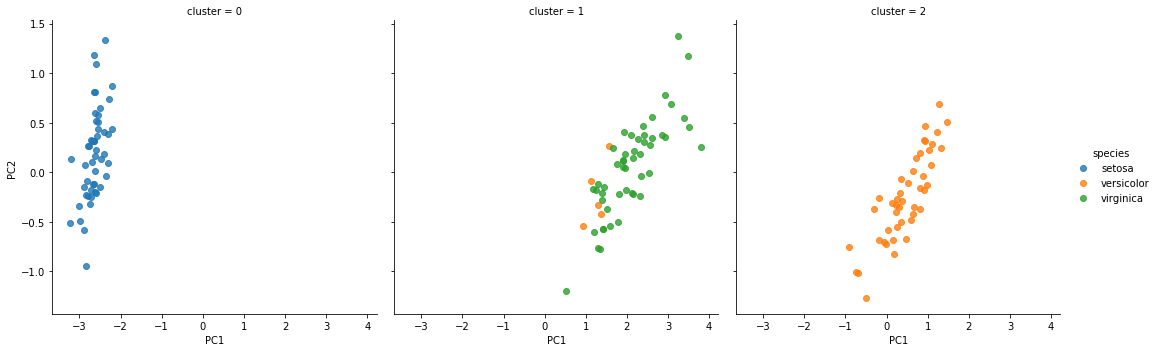

In [36]:
# Modelling by Gaussian Mixture Modelling
mod = GaussianMixture(n_components=3, covariance_type='full')
mod.fit(x)
y_gmm = mod.predict(x)

# Bring out the culsters
df['cluster'] = y_gmm
sns.lmplot('PC1', 'PC2', data = df, 
           hue = 'species', 
           col = 'cluster', 
           fit_reg=False)

From the `GMM` analysis we can observe there is a possible miss labeling occured between two labels which can be compared with the true labels. Here we can observe that PCA could not capture such data-points in the primary axis.

### Inference

### Working with Image Datasets - Handwritten digits